In [1]:
!pip install https://github.com/elyase/geotext/archive/master.zip
!pip install topojson

     / 2.3 MB 52 kB/s
  Created wheel for geotext: filename=geotext-0.3.0-py2.py3-none-any.whl size=2272483 sha256=bb41590c6b264842453f2946e9a9667f12e31e47cdd35305669c569b848cab08
  Stored in directory: /tmp/pip-ephem-wheel-cache-v4t4xwdn/wheels/c3/82/e9/208ca98c5e7fd6edcd87669e8270db1d858cd078d230452cd5
Successfully built geotext
     |████████████████████████████████| 78 kB 4.8 MB/s 


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
!pip install country_converter --upgrade

     |████████████████████████████████| 49 kB 4.7 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.3-py3-none-any.whl size=52304 sha256=d31346c9fb6eb20aa0f944e0ef8bebd46a8a743566f88ca6eccdbe63142a0daf
  Stored in directory: /root/.cache/pip/wheels/2e/d9/03/664296e7e90b85b7e8ffca3af6cacdb299eec3929d62746505
Successfully built country-converter


In [4]:
!pip install -q emoji

     |████████████████████████████████| 170 kB 12.4 MB/s 


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geotext import GeoText
import json
import topojson
import country_converter as coco
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 
#this was part of the NLP notebook
import nltk
nltk.download('punkt')
#import sentence tokenizer
from nltk import sent_tokenize
#import word tokenizer
from nltk import word_tokenize
#list of stopwords
from nltk.corpus import stopwords
import string
#import geograpy
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshanadahanayake","key":"d96bc21a529135d342ca9c7c58f1cfac"}'}

In [8]:
!mkdir ~/.kaggle

In [9]:
!cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d gpreda/covid19-tweets

 97% 27.0M/27.9M [00:00<00:00, 35.5MB/s]
100% 27.9M/27.9M [00:00<00:00, 61.6MB/s]


In [12]:
!unzip covid19-tweets.zip


Archive:  covid19-tweets.zip
  inflating: covid19_tweets.csv      


### Location Analysis

In [13]:
covid_df = pd.read_csv('/content/covid19_tweets.csv')

In [14]:
covid_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [15]:
covid_df.shape

(179108, 13)

In [16]:
covid_df.isnull().count()

user_name           179108
user_location       179108
user_description    179108
user_created        179108
user_followers      179108
user_friends        179108
user_favourites     179108
user_verified       179108
date                179108
text                179108
hashtags            179108
source              179108
is_retweet          179108
dtype: int64

In [17]:
covid_df = covid_df.dropna()

In [18]:
covid_df.shape

(99138, 13)

In [19]:
Location_count=pd.DataFrame(covid_df['user_location'].value_counts())
Location_count.head()

,user_location
India,2928
United States,1728
"New Delhi, India",1349
"Mumbai, India",1098
"Washington, DC",956


In [20]:
Location_count.reset_index(inplace=True)


In [21]:
Location_count.rename(columns={'index':'Location','user_location':'count'},inplace=True)

In [22]:
Location_count.sort_values(by='count', inplace=True, ascending=False)
Location_count

,Location,count
0,India,2928
1,United States,1728
2,"New Delhi, India",1349
3,"Mumbai, India",1098
4,"Washington, DC",956
...,...,...
11853,Scotland,1
11854,🇫🇷/🇪🇸/🇬🇧/🇮🇪/ 🇺🇸,1
11855,Died a little in November 2016,1
11856,"ÜT: 36.046461,-83.424167",1


In [23]:
Count_graph=px.bar(x='Location',y='count',data_frame=Location_count[:15],color='Location')
Count_graph.show()

In [24]:
location=Location_count.loc[2]['Location']

In [25]:
print(GeoText(location).countries)

['India']


In [26]:
Location_country=Location_count.copy()

In [27]:
Location_country['Location']=Location_country['Location'].apply(lambda x:x.replace(',',' '))

In [28]:
Location_country

,Location,count
0,India,2928
1,United States,1728
2,New Delhi India,1349
3,Mumbai India,1098
4,Washington DC,956
...,...,...
11853,Scotland,1
11854,🇫🇷/🇪🇸/🇬🇧/🇮🇪/ 🇺🇸,1
11855,Died a little in November 2016,1
11856,ÜT: 36.046461 -83.424167,1


In [29]:
Location_country['Location']=Location_country['Location'].apply(lambda x:(GeoText(x).country_mentions))

In [30]:
Location_country.head()

,Location,count
0,{'IN': 1},2928
1,{'US': 1},1728
2,{'IN': 2},1349
3,{'IN': 2},1098
4,{'GB': 1},956


In [31]:
Location_country.drop(Location_country[Location_country['Location']=='[]'].index,inplace=True)

In [32]:
Location_country['Location']=Location_country['Location'].apply(lambda x:(x.keys()))

In [33]:
Location_country['Location']=Location_country['Location'].apply(lambda x:list(x))

In [34]:
Location_country.drop(Location_country.index[Location_country.Location.map(len)==0],inplace=True)

In [35]:
Location_country['Location']=Location_country['Location'].apply(lambda x:str(x[0]))

In [36]:
Location_country

,Location,count
0,IN,2928
1,US,1728
2,IN,1349
3,IN,1098
4,GB,956
...,...,...
11844,US,1
11848,IN,1
11850,GB,1
11852,ZA,1


In [37]:
agg_func={'count':'sum'}
Location_country=Location_country.groupby(['Location']).aggregate(agg_func)

In [38]:
Location_country.head()

,count
Location,
AE,536
AF,67
AL,13
AM,57
AO,2


In [39]:
Location_country.sort_values(by=['count'],ascending=False,inplace=True)
Location_country.reset_index(inplace=True)
Location_country.columns

Index(['Location', 'count'], dtype='object')

In [40]:
Count_graph=px.bar(x='Location',y='count',data_frame=Location_country[:15],color='Location')
Count_graph.show()

In [41]:
cc = coco.CountryConverter()
Location_country['Location']=Location_country['Location'].apply(lambda x:cc.convert(names=x,to='ISO3'))

In [42]:
Location_country

,Location,count
0,USA,19962
1,IND,14562
2,GBR,8280
3,CAN,3773
4,AUS,3075
...,...,...
187,BVT,1
188,SUR,1
189,GUF,1
190,GGY,1


In [43]:
fig = px.choropleth(
    Location_country,
    locations="Location",    
    color="count",    
    hover_data=["count"],
    title="Number of tweets from each country",
)
fig.show()

### Language Analysis

In [44]:
tweets=pd.DataFrame(covid_df['text'])

In [45]:
tweets.isnull().count()

text    99138
dtype: int64

In [46]:
tweets = tweets.dropna()
tweets.shape

(99138, 1)

In [47]:
# Function to remove emojis
def deEmojify(text):
  return text.encode('ascii','ignore').decode('ascii')

In [48]:
# Function to remove punctuation
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [49]:
#Function for text transformation
def nlp(df):     
    # lowercase everything
    df['token'] = df['text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    df['token'] = df['token'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['token'] = df['token'].str.replace('http\S+|www.\S+', '', case=False)
    # removing '&gt;'
    df['token'] = df['token'].apply(lambda x: x.replace('&gt;', ''))
    # Removing Emojis from tokens
    df['token'] = df['token'].apply(lambda x: deEmojify(x))
    # remove punctuations
    df['token'] = df['token'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['token'] = df['token'].apply(lambda x: str(x).replace(" s ", " "))
    return df

In [50]:
tweets1 = (nlp(tweets))
tweets1

,text,token
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane3443 wdunlap realdonaldtrump trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv the one gift covid19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 july media bulletin on novel coronavirus...
5,#coronavirus #covid19 deaths continue to rise....,coronavirus covid19 deaths continue to rise ...
6,How #COVID19 Will Change Work in General (and ...,how covid19 will change work in general and ...
...,...,...
179101,Wallkill school nurse adds COVID-19 monitoring...,wallkill school nurse adds covid 19 monitoring...
179102,"we have reached 25mil cases of #covid19, world...",we have reached 25mil cases of covid19 world...
179103,Thanks @IamOhmai for nominating me for the @WH...,thanks iamohmai for nominating me for the wh...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 the year of insanity lol covid19


In [51]:
!pip install langdetect

     |████████████████████████████████| 981 kB 15.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b4082e38b7effb03ef8ac29a89ecbd9016fad6b167bc4897b7844084d2b04861
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [52]:
from langdetect import detect

In [53]:
#Function to detect language
def detect_lang(text):
  try:
    return detect(text)
  except:
    return 'unknown' 

In [54]:
tweets1['Lang'] = tweets1['token'].apply(detect_lang)

In [55]:
tweets1

,text,token,Lang
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane3443 wdunlap realdonaldtrump trump nev...,en
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv the one gift covid19 has give me...,en
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 july media bulletin on novel coronavirus...,en
5,#coronavirus #covid19 deaths continue to rise....,coronavirus covid19 deaths continue to rise ...,en
6,How #COVID19 Will Change Work in General (and ...,how covid19 will change work in general and ...,en
...,...,...,...
179101,Wallkill school nurse adds COVID-19 monitoring...,wallkill school nurse adds covid 19 monitoring...,en
179102,"we have reached 25mil cases of #covid19, world...",we have reached 25mil cases of covid19 world...,en
179103,Thanks @IamOhmai for nominating me for the @WH...,thanks iamohmai for nominating me for the wh...,en
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 the year of insanity lol covid19,en


In [58]:
tweets_Lang=pd.DataFrame(tweets1['Lang'].value_counts())
tweets_Lang.head()

,Lang
en,97633
it,290
es,247
id,144
ca,134


In [59]:
tweets_Lang.reset_index(inplace=True)

In [60]:
tweets_Lang.rename(columns={'index':'Language','Lang':'Count'},inplace=True)

In [63]:
tweets_Lang.sort_values(by='Count', inplace=True, ascending=False)



In [73]:
Lang_graph=px.pie(data_frame=tweets_Lang[:5], values='Count', names='Language', title='Tweets By Language')
Lang_graph.update_traces(textposition='inside', textinfo='percent+label')
Lang_graph.show()

### Word Cloud for the tweets

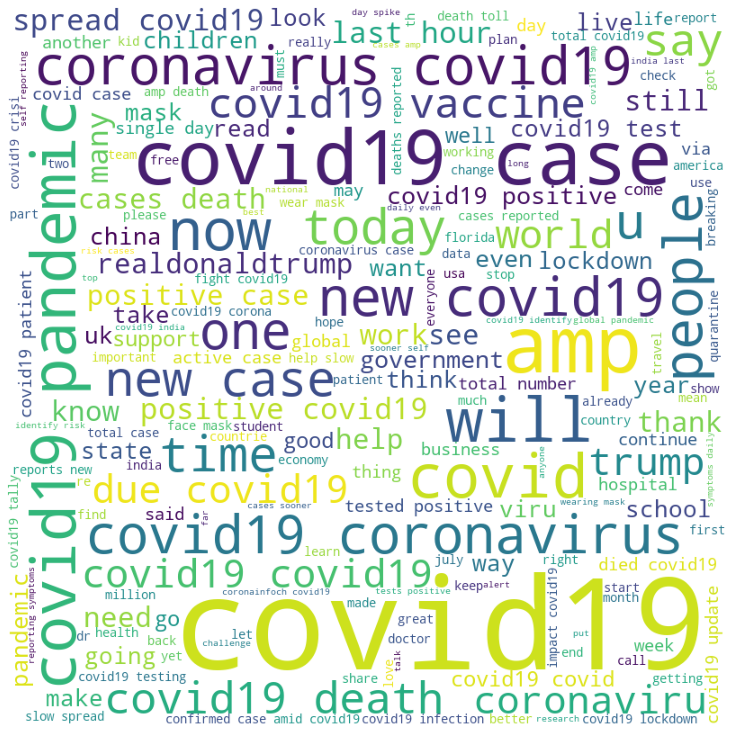

In [74]:
tweet_words=''
for val in tweets1.token: 
      
    
    val = str(val)  # typecaste each val to string
  
     
    tokens = val.split() # split the value
      
    
    for i in range(len(tokens)):  # Converts each token into lowercase
        tokens[i] = tokens[i].lower() 
      
    tweet_words += " ".join(tokens)+" "
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(tweet_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 